<h2>Unit 14 Live Session </center> </h2>
<h3> W203 Instructional Team </h3>
<h3> Causality </h3>

<center>![title](causality.jpg)</center>

<h3> Class Announcements </h3>
1. Course evals: https://course-evaluations.berkeley.edu/berkeley/
2. Congrats you are done.

<h3> 1 Potential Outcomes Framework </h3>

Causal inference, which concerns what would happen to an outcome $Y$ as a result of a hypothesized "treatment" or intervention, in a regression framework, the treatment can be written as a variable D:

$$
D_i = 
\begin{cases}
    1 ,& \text{if unit i receives the "treatment"}\\
    0, & \text{if unit i receives the "control,"}
\end{cases}
$$ 

Furthermore we construct the potential outcomes frame work

$$
\text{Potential Outcome} = 
\begin{cases}
    Y_{1i} ,& \text{if } \;\; D_i = 1\\
    Y_{0i}, & \text{if } \;\;  D_i = 0
\end{cases}
$$ 

Based on this framework what we would like to measure is the Average Treatment Effect (ATE) 

$$
\text{ Average Treatment Effect} = E[Y_{1i} - Y_{0i}]
$$

But this is something we cannot measure since we only observe one outcome for each unit, either $Y_{1i}$ or $Y_{0i}$.

<h3> 2 What You Can Measure </h3>

What we can measure is the difference between average outcomes in treated and untreated groups.

Recall from your reading, i.e. Angrist and Pischke "Mastering Metrics" Chapter 1 that in the investigation of the average treatment effect of insurance naturally begins by comparing the average health of groups of insured and uninsured people, Difference in group means = Treatment on the treated + Selection bias. 

$$
\begin{aligned}
\text{ What Can Be Measured} &= E[Y_i|D_i = 1] - E[Y_i|D_i = 0] \\
& = E[Y_{1i}| D_i = 1] - E[Y_{0i}|D_i = 0] \\
& = E[Y_{1i}| D_i = 1] - E[Y_{0i}|D_i = 1] + E[Y_{0i}|D_i = 1] - E[Y_{0i}|D_i = 0] \\
& = E[Y_{1i} - Y_{0i}| D_i = 1] + E[Y_{0i}|D_i = 1] - E[Y_{0i}|D_i = 0] \\
& = \text{Treatment on The Treated (TOT)} + \text{Selection Bias} 
\end{aligned}
$$

We got this by adding and subtracting the unobserved untreated outcome for the observations that get the treatment. If the treatment and control groups are fundamentally different their untreated outcome will be different hence selection bias will be non zero.

Lets simulate this by constructing a sample of treated and untreated outcomes who differ only in their mean untreated outcomes. i.e. Let $Y^{m}_{0i}$ and $Y^{w}_{0i}$ be the untreated potential outcomes for the ith man and woman respectively. Let

$$ Y^{m}_{0i} \sim N(2,1/4) \;\;\;\text{ and } \;\;\; Y^{w}_{0i} \sim N(1,1/4) $$

As a result of having two groups with differing untreated potential outcomes, unless the proportion of men and women are the same in both treated $D=1$ and untreated $D=0$ groups selection bias will result since.

For example if, 

$$ p_0 = \frac{\# \text{ of women in untreated group}}{\# \text{ of people in untreated group}} \;\;\;\;\; \text{ and } \;\;\;\;\; p_1 =  \frac{\# \text{ of women in treated group}}{\# \text{ of people in treated group}} $$

Then 

$$
E[Y_{0i}|D_i = 0] =  p_0 E[Y^w_{0i}] + (1-p_0)E[Y^m_{0i}]
$$
and 
$$
E[Y_{0i}|D_i = 1] =  p_1 E[Y^w_{0i}] + (1-p_1)E[Y^m_{0i}]
$$

Now we can see that selection bias will only be zero if $p_0=p_1$ or if $E[Y^w_{0i}] = E[Y^m_{0i}]$ since,

$$
\begin{aligned}
E[Y_{0i}|D_i = 1] - E[Y_{0i}|D_i = 0] &= (p_1 - p_0) E[Y^w_{0i}] - (p_1 - p_0)E[Y^m_{0i}] \\
& = (p_1-p_0)(E[Y^w_{0i}] - E[Y^m_{0i}])
\end{aligned}$$ 

Furthermore let average treament effect for both men and women be the same

$$ Y^{m}_{1i} - Y^{m}_{0i} \sim  N(5,1) \;\;\; \text{ and } \;\;\;  Y^{w}_{1i} - Y^{w}_{0i} \sim  N(5,1)$$


In [38]:
set.seed(12345)
# Number of observations per group
n <-50
# Average Treament Effect
ate <-5
# Variance of treament Effect
ate_var <-1
# Mean untreated outcomes and variances
m_mean_untreated <- 2
w_mean_untreated <- 1
# 
var_untreated <- 1/4

Here we generate the full data set, with all treated and untreated potential outcomes

In [45]:
# Generating the data for women
w_untreated <- rnorm(n,w_mean_untreated,var_untreated)
w_treatment_effect <-rnorm(n,ate,ate_var)
w_treated <- w_untreated + w_treatment_effect

# Generating the data for men
m_untreated <- rnorm(n,m_mean_untreated,var_untreated)
m_treatment_effect <- rnorm(n,ate,ate_var)
m_treated <- m_untreated + m_treatment_effect

Here are the characteristics of the sample

In [46]:
paste('Sample ATE for W: ',mean(w_treated-w_untreated))
paste('Sample ATE for M: ',mean(m_treated-m_untreated))
paste('Full Sample ATE: ', mean(c(sample_w_ate,sample_m_ate)))

[1] "Sample ATE for W:  4.97780100718643"

[1] "Sample ATE for M:  5.12570593161155"

[1] "Full Sample ATE:  5.08328072898643"

Now we construct a function to create sample with selection bias.

In [34]:
my_ate <- function(p,n,w_treated,w_untreated,m_treated,m_untreated){
    # Number of treated women
    num_w <- floor(p*n)
    # Number of treated men
    num_m <- ceiling((1-p)*n)
    # Index of treated observations
    w_treated_index <- sample(1:n,num_w,replace=F)
    m_treated_index <- sample(1:n,num_m,replace=F)
    # Index of untreated observations
    w_untreated_index <- setdiff(1:n,w_treated_index)
    m_untreated_index <- setdiff(1:n,m_treated_index)
    # Treated observations
    w_treated_obs <- w_treated[w_treated_index]
    m_treated_obs <-m_treated[m_treated_index] 
    # Untreated observations
    w_untreated_obs <- w_untreated[w_untreated_index]
    m_untreated_obs <- m_untreated[m_untreated_index] 
    # Combining
    treated_obs<- c(w_treated_obs,m_treated_obs)
    untreated_obs<- c(w_untreated_obs,m_untreated_obs)
    # Calculating the sample ATE
    p_sample_ate <- mean(treated_obs) - mean(untreated_obs)
    return(p_sample_ate)
    }

Now we sample this function for values of p between 0.01 and 1, note a p increases women should go from under represented to over represented in the sample this reducing the selection bias from 1 to negative 1. 

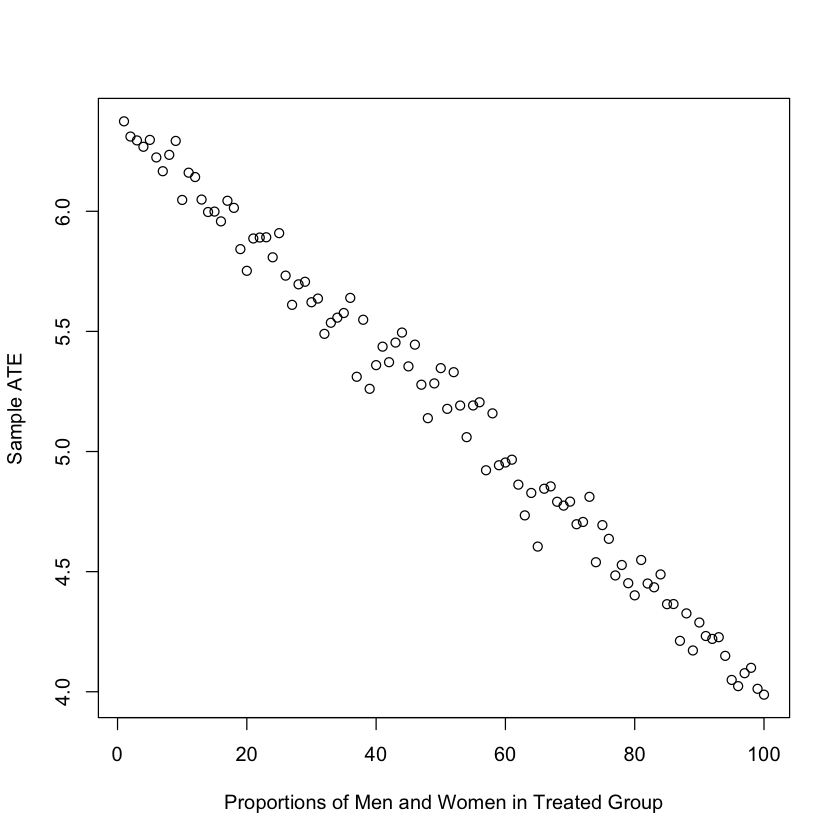

In [44]:
# Initializing the calculated ate vector
ate_data=c()
# Calculating the sample ate for p=0.01 to p=1.00
for ( i in 1:100){
    ate_data[i] <- my_ate(i/100,n,w_treated,w_untreated,m_treated,m_untreated)
    }
plot(1:100,ate_data,ylab = "Sample ATE",xlab="Proportions of Men and Women in Treated Group")

<h3> 3 Random Assignment to Treatment </h3>

Experimental random treament assignment is one method of eliminating selection bias. The logistics of a randomized experiment, sometimes called a randomized trial, may seem simple, but using it effectively can be a complex process. In a randomized experiment, participants in various groups should not differ in any systematic way. In a clinical trial, if treatment groups are systematically different, trial results will be biased. 

<!--More generally, causal inference can be viewed as a special case of prediction in which the goal is to predict what would have happened under different treatment options.-->

<h4> 3.1 Effect on Selection Bias </h4>

With true randomization of treatment assignment, all participants in the study are given the same opportunity to be allocated or assigned to each of the study groups. Supposing that all those who are assigned treatment are treated, and all who are assigned to the control group are untreated then there is no difference in the two groups thus,

$$ 
\text{Selection Bias} = E[Y_{0i}|D_i=1] - E[Y_{0i}|D_i=0] = E[Y_{0i}] - E[Y_{0i}] = 0
$$

So under this restriction we have solved that problem.

In [36]:
my_ate(0.5,n,w_treated,w_untreated,m_treated,m_untreated)

[1] 5.056231

but even a perfectly randomized method to assign participants to treatment groups does not protect against selection bias. 

<h3> 4 Compliance </h3>

Another type of selection bias can arise when participants can select themselves in or out of study based on whether the receive the treament or not.  

<ul>
<li> People who know that the treatment will have a large effect on them will be more likely to sign up. 
    <br><br>
<li> People who aren't assigned the treatement will drop out of the study. 
</ul>

Conditioning an estimate of association on participation can induce an association between exposure and disease, when no association exists among all those eligible to participate. Researchers can adjust estimates of association measured among participants to account for the bias introduced by conditioning on participation, when participation is affected by both exposure and disease. 

This adjustment is often difficult since it ideally requires an assessment of the participation proportion among each of the four combinations of exposed (when exposure is dichotomous) and diseased. Often the exposure status and disease status of the nonparticipants will be unknown - their participation is required to ascertain this information. 

Furthermore another level of selection bias can occur when participants in the study can select themselves in and out of treatment groups based on their assignment. i.e. Treatment Assignement $\neq$ Treatment Received (Confounding) 

<ul>
  <li> People always want the treament they are not assigned (Defiers)
      <br><br>
  <li> People refuse to get the treatement if assigned but will take the treatment because they know that the control will be more beneficial to them. (Never Takers)
      <br><br>
  <li> People will stop at nothing to get the treatement because they know that the control will be more beneficial to them. (Always Takers)
</ul>

Selection bias occurs when the two variables whose association is under study, usually an exposure/treament assignment and a disease outcome, both affect treatment received.

However if all goes right and participation in the study and assignment/receipt of treatment all go according to plan one can argue that both potential out comes ${Y_{0i},Y_{1i}}$ are independent of treamtent assignment which gives us. 

$$ 
\begin{aligned}
 \text{What We Can Measure} & = E[Y_i|D_i = 1] - E[Y_i|D_i = 0]  \\
 &=  E[Y_{1i} - Y_{0i}| D_i = 1] + E[Y_{0i}|D_i = 1] - E[Y_{0i}|D_i = 0] \\ 
 & =  E[Y_{1i} - Y_{0i}] + E[Y_{0i}] - E[Y_{0i}] \\
 & =  E[Y_{1i} - Y_{0i}]\\
 & = \text{Average Treatment Effect (ATE)}
 \end{aligned}
$$ 

<h3> 5 Case-control study </h3>

Randomized control trial are expensive and often infeasible so researchers to resort observational data to infer a causal relationship. One such framework is the case control study.  

Case-control studies start with the identification of a group of cases (individuals with a particular health outcome) in a given population and a group of controls (individuals without the health outcome who resemble the cases in some way) to be included in the study. A case-control study involves the identification of individuals with ('cases') and without ('controls') a particular disease or condition. The prevalence (or level) of exposure to a factor is then measured in each group. If the prevalence of exposure among cases and controls is different, it is possible to infer that the exposure may be associated with an increased or decreased occurrence of the outcome of interest.

For example suppose that we are interested in the effect of a particular drinking water contaminent Soylent Green on mercury levels in the blood. The treated group is a small town Bunkerville, whose entire population, by accident, was exposed to higher levels Soylent Green, this will be our treated group. What we will then do is try to find participants from the nearby town Darden whose water was uncontaminated but otherwise has very similar charactersitics to Bunkerville. We will attempt to recruit people from both towns to come in a get a blood test so that we can compare mercury levels between groups. 

If the participation rates of those who live in Darden are different from those who live in Bunkerville a selection bias may result. Meaning that even though on average the two towns are the same but the groups who choose to participate may be fundamentally different.

In a case-control study, researchers typically know the proportion of cases and controls who agree to participate and the exposure prevalence of participating cases and controls is known from the data gathered on participants, but the exposure prevalence of cases and controls who did
not participate is unknown.

In practice, controls must fulfill all the eligibility criteria defined for the cases apart from those relating to diagnosis of the disease. In case-control studies, controls should represent the population from which the cases are drawn, i.e., they should provide an estimate of the exposure prevalence in the population from which the cases arise. If not, the results of the study are likely to be distorted because of selection bias.
